In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
features = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement']
num_of_features = len(features)

In [4]:
x = df[features].values
x.shape

(21613, 9)

In [5]:
y = df['price'].values
y.shape

(21613,)

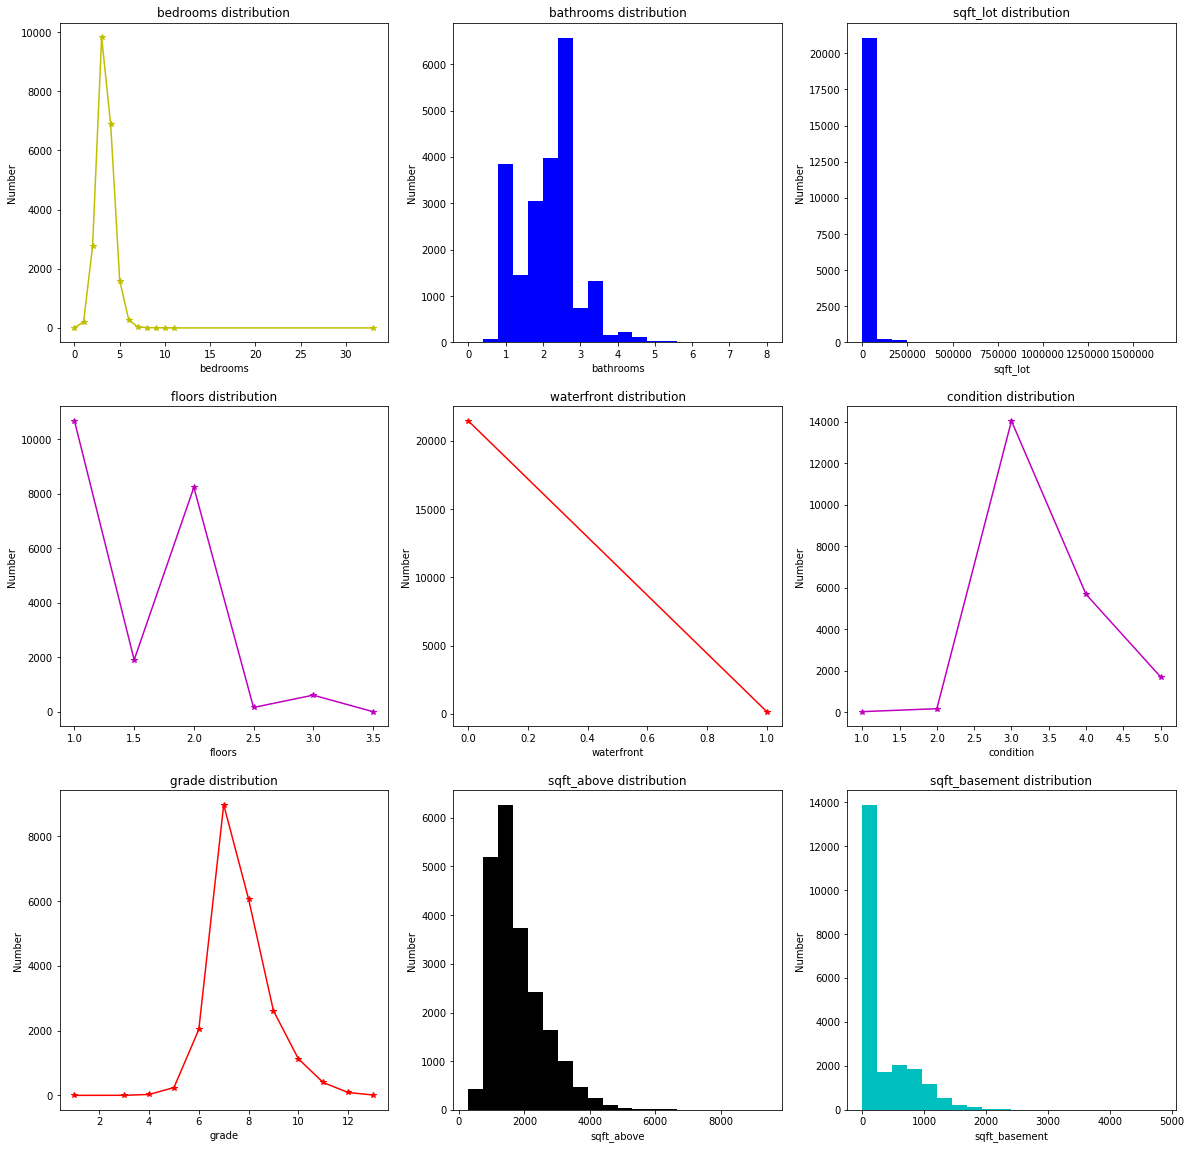

In [6]:
#distribution
import random
plt.figure(figsize=(20, 20))
colors = ['blue', 'r', 'c', 'm', 'y', 'k']
for i in range(num_of_features):
    plt.subplot(3, 3, i+1)
    
    color = random.choice(colors)
    feature = features[i]
    values = df[feature].values
    unique, counts = np.unique(values, return_counts=True)
    
    if (len(counts) <= 20):
        plt.plot(unique, counts, color, marker='*')
        plt.xlabel(feature)
        plt.ylabel('Number')
        plt.title('%s distribution' % feature)
    
    else:
        plt.hist(df[feature].values, bins=20, color=color)
        plt.xlabel(feature)
        plt.ylabel('Number')
        plt.title('%s distribution' % feature)

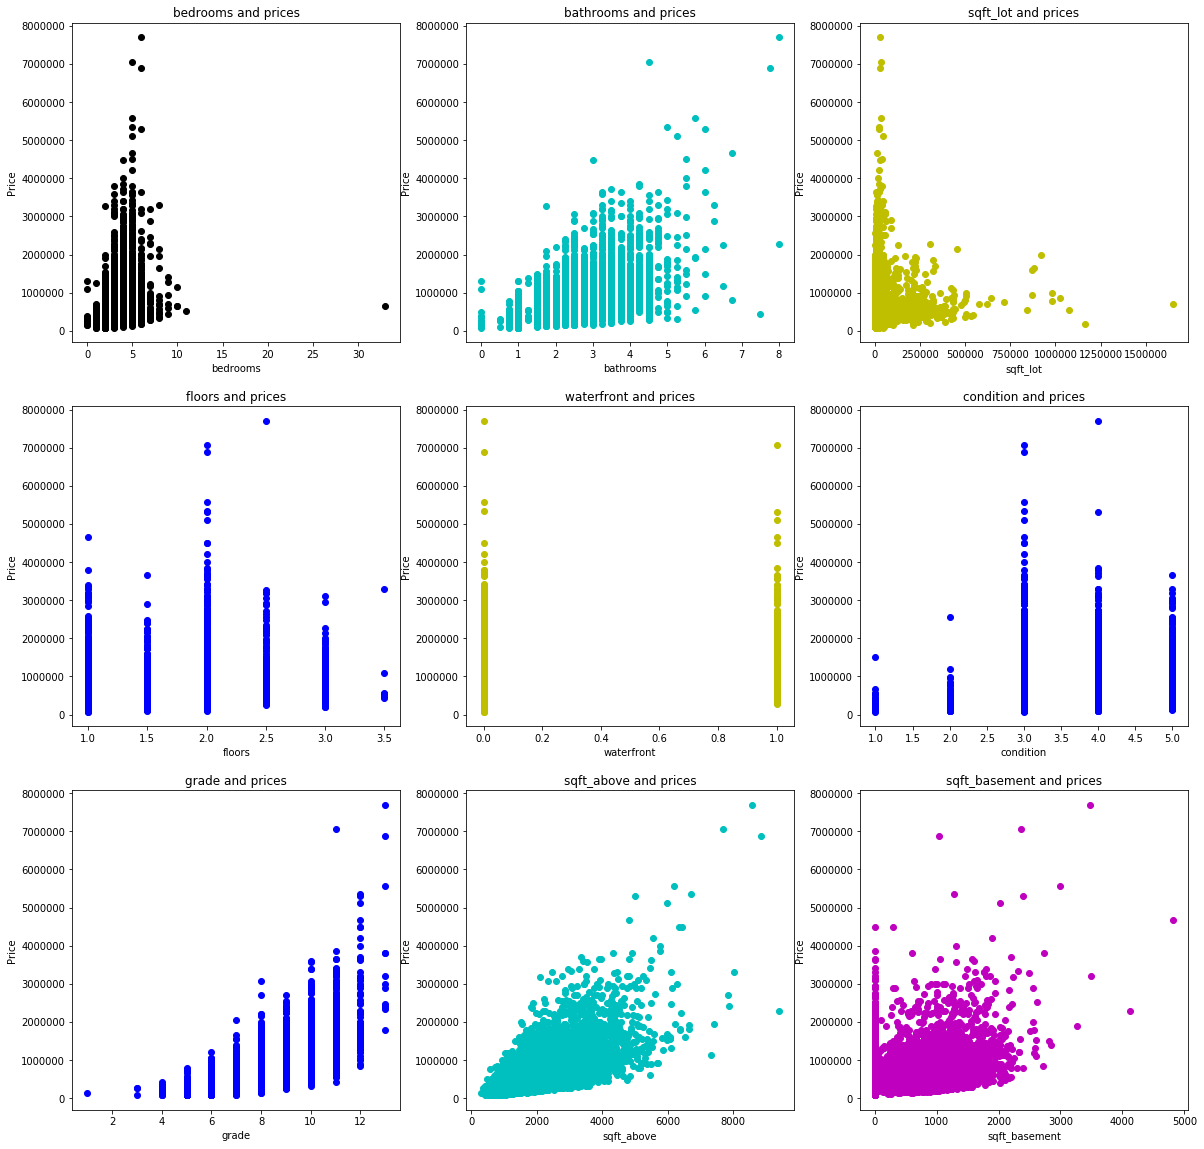

In [7]:
#scatter
plt.figure(figsize=(20, 20))
y_mean = np.mean(y)
for i in range(num_of_features):
    color = random.choice(colors)
    feature = features[i]
    values = df[feature].values
    
    plt.subplot(3, 3, i+1)
    plt.scatter(values, y, color=color)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title('%s and prices' % feature)
    

price            1.000000
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
sqft_lot         0.089661
condition        0.036362
Name: price, dtype: float64


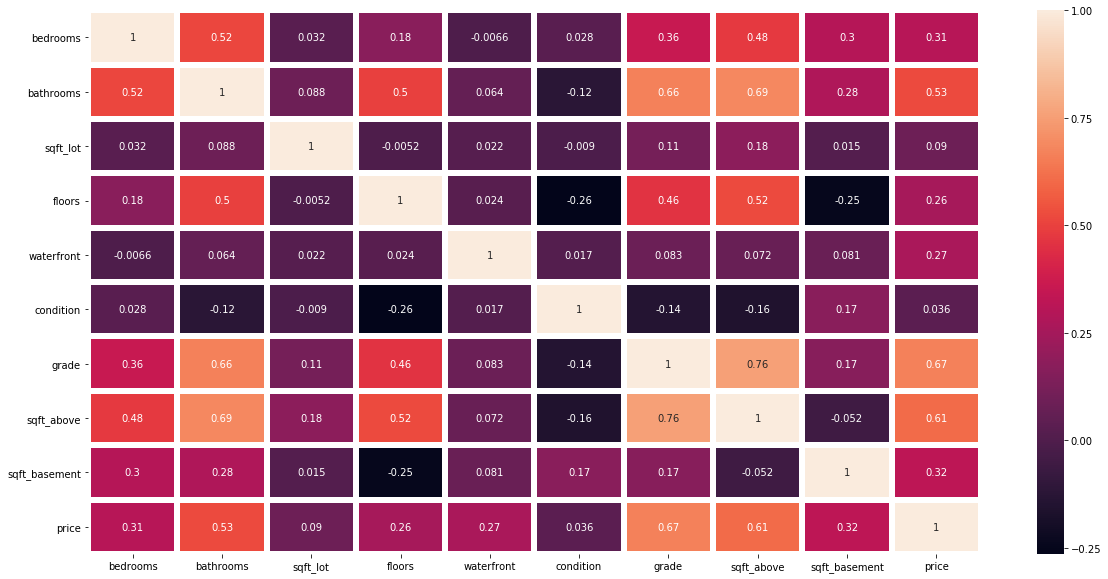

In [11]:
import seaborn as sns
import copy
plt.figure(figsize=(20,10))
if 'price' not in features:
    features.append('price')
corrmat = df[features].corr()
print(corrmat['price'].sort_values(ascending=False))
sns.heatmap(corrmat, square=False, linewidth=5, annot=True)